# ICE-5 Machine learning with image features

## (Tutorial) Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2
import numpy

In [26]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [27]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [28]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

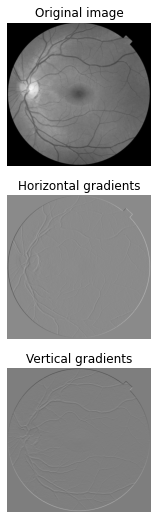

In [29]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Task 1. Design your code to compute diagonal gradient of the image used in the example and visualize it

In [30]:
# write your code here
image = color.rgb2gray(data.retina())
gz = np.empty(image.shape, dtype=np.double)
gz[:,0] = 0
gz[:,-1] = 0
gz[0:,]= 0
gz[-1,:]=0
gz[1:-1,1:-1] = image[2:,:-2] - image[:-2,2:]

gs = np.empty(image.shape, dtype=np.double)
gs[:,0] = 0
gs[-1,:] = 0
gs[0,:] = 0
gs[:,-1] = 0
gs[1:-1,1:-1] = image[2:,2:] - image[:-2,:-2]



fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(15, 27), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')

ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('vertical gradients')
ax3.set_adjustable('box')

ax4.axis('off')
ax4.imshow(gz, cmap=plt.cm.gray)
ax4.set_title('diagonal1 gradients')
ax4.set_adjustable('box')

ax5.axis('off')
ax5.imshow(gs, cmap=plt.cm.gray)
ax5.set_title('diagonal2 gradients')
ax5.set_adjustable('box')

## **Question 1**. Explain why we don't directly use the simplest image features (color or number of pixels)

**Answer to Q1**: type your answer here


We don't directly use the simplest image feature as there is a probabitlty that two pictures may have roughly the same color profile but they might be completly different items in the images.

While if we choose to measure the pixel value differences between images. First, resize the images to have the same width and height. Each image is represented by a matrix of pixel values. The matrix can be stacked into one long vector, either by row or by column. The color of each pixel (e.g., the RGB encoding of the color) is now a feature of the image. Finally, measure the Euclidean distance between the long pixel vectors.But the individual pixels do not carry enough semantic information about the image. Therefore, We don't directly use the simplest image features.

for example:- sugar cube and dry ice cube, when used with color or number of pixels both would be the same way

---

## (Tutorial) HOG image features

In [31]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

In [32]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## Task 2. ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

In [33]:
# write your code here
import matplotlib.pyplot as plt 
import numpy as np
from skimage.feature import hog,ORB
from skimage import data, color, exposure
#import cv2

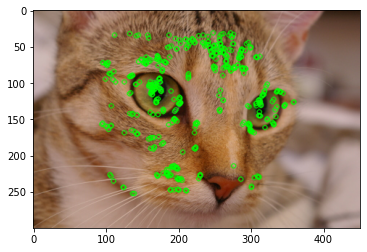

(<matplotlib.image.AxesImage at 0x1818677ed00>, None)

In [34]:
# write your code here
img=data.chelsea()

query_img_bw = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

orb=cv2.ORB_create()

queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)

img2 = cv2.drawKeypoints(img,queryKeypoints,outImage = None,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [35]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [36]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [37]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.camera()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

Text(0.5, 1.0, 'The histogram of visual words')

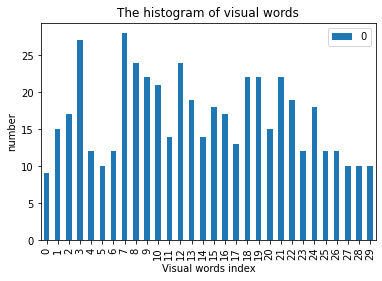

In [38]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Task 3. Bag-of-Visual-Words for multiple images
Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

In [39]:
# wirte your code here
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [40]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [41]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
import PIL
img = data.cat()
kmeans = KMeans(n_clusters = 60)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
imag =  [r'cat images\cat1.jpg',
          r'cat images\cat2.jfif',
          r'cat images\cat3.jfif',
          r'cat images\cat4.jfif',
          r'cat images\cat5.jfif',
          r'cat images\cat6.jfif',
          r'cat images\cat7.jfif',
          r'cat images\cat8.jfif',
          r'cat images\cat9.jfif']
images = []
for ima in imag:
    ima = PIL.Image.open(ima)
    ima = np.array(ima)
    images.append(ima)
images.append(img)
h=0
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          h +=histogram 
          preprocessed_image.append(histogram)

Text(0.5, 1.0, 'The histogram of visual words')

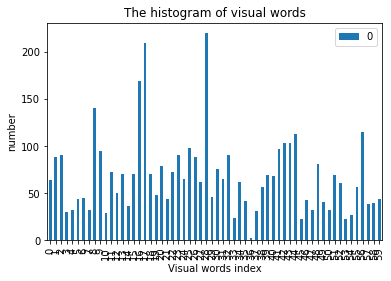

In [42]:
import pandas as pd
df = pd.DataFrame(h)
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')


## Question 2. Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

**Answer to Q2**: type your answer here


Feature scaling has significant effect in the Bag-of-visual-words.This is because in this case for images is different compared to text.Images has lot of changes for the same object, the changes may be like shadows,contrast,brightness,etc.For example if we consider taking picture of a person or an object, the formed image may vary depending on the light around it.These changes can be considered as contrasts. So scaling does color normalization. 



---